In [1]:
# libraries
library(community)
library(data.table) #to read gz file
library(tidyverse)

Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘tibble’ was built under R version 4.1.3”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::tran

In [2]:
input_dir <- "input_data/"

In [3]:
# # load counts
print("load counts")
counts <- fread(paste0(input_dir,"counts_lognorm.csv.gz"), header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
print(str(counts))

[1] "load counts"
'data.frame':	15770 obs. of  46702 variables:
 $ X2020.09.15.AML0024.CATCAAGGTTAGCGGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCAAGTCCGAGAAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCCACAGGGACCAT           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGAGCAAGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGTTCCATG           : num  0 0.993 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTAGAATAC           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTTCTCCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCCGAACGC           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCTAGTCAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACAAGACAGTCG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAATTGCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAGAACTAA           : num  0 0 0 0 0 0 0 

In [4]:
# load cell annotation
print("load cell annotation")
anno_cells <- read.table(paste0(input_dir,"anno_cells_norm.txt")
                         ,sep = "\t"
                         # ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

[1] "load cell annotation"
'data.frame':	46702 obs. of  92 variables:
 $ sample_ID                    : chr  "AML-0024" "AML-0024" "AML-0024" "AML-0024" ...
 $ cell                         : chr  "2020-09-15-AML0024:CATCAAGGTTAGCGGA" "2020-09-15-AML0024:CATCAAGTCCGAGAAG" "2020-09-15-AML0024:CATCCACAGGGACCAT" "2020-09-15-AML0024:CCTCAACAGAGCAAGA" ...
 $ UMAP_1                       : num  -0.731 -2.2 -2.867 -1.666 -0.972 ...
 $ UMAP_2                       : num  -15.8 -16.7 -16.1 -16.1 -17.5 ...
 $ orig.ident                   : chr  "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" ...
 $ samples                      : chr  "AML0024" "AML0024" "AML0024" "AML0024" ...
 $ Broad_cell_identity          : chr  "CD14+ monocyte" "CD14+ monocyte" "CD16+ monocyte" "CD14+ monocyte" ...
 $ Cell_type_identity           : chr  "CD14+ IFN+" "CD14+" "CD16+" "CD14+ IFN+" ...
 $ clusters_res.2               : int  7 7 7 7 80 7 7 7 7 7 ...
 $ CNV_pos                   

In [7]:
data("LR_database")

In [15]:
gene_space <- unique(LR_database$Ligand,LR_database$Receptor)

In [20]:
head(anno_cells$cell_ID)

[1] "2020.09.15.AML0024.CATCAAGGTTAGCGGA" "2020.09.15.AML0024.CATCAAGTCCGAGAAG"
[3] "2020.09.15.AML0024.CATCCACAGGGACCAT" "2020.09.15.AML0024.CCTCAACAGAGCAAGA"
[5] "2020.09.15.AML0024.CCTCAACAGTTCCATG" "2020.09.15.AML0024.CCTCAACGTAGAATAC"

In [21]:
head(colnames(counts))

[1] "X2020.09.15.AML0024.CATCAAGGTTAGCGGA"
[2] "X2020.09.15.AML0024.CATCAAGTCCGAGAAG"
[3] "X2020.09.15.AML0024.CATCCACAGGGACCAT"
[4] "X2020.09.15.AML0024.CCTCAACAGAGCAAGA"
[5] "X2020.09.15.AML0024.CCTCAACAGTTCCATG"
[6] "X2020.09.15.AML0024.CCTCAACGTAGAATAC"

In [22]:
colnames(counts) <- anno_cells$cell_ID

In [65]:
mono <- anno_cells[anno_cells$cell_type == "Mono",]

In [66]:
counts_mono <- counts[,colnames(counts) %in% mono$cell_ID]

In [67]:
counts_mono <- counts_mono[rownames(counts_mono) %in% gene_space, ]

In [73]:
nrow(mono)

[1] 18004

In [72]:
ncol(counts_mono)

[1] 18004

In [74]:
library(ggplot2)

In [112]:
gene_counts_sum_df <- data.frame(Gene = rownames(counts_mono), Count = rowSums(counts_mono))

In [110]:
gene_counts_sum_df <- gene_counts_sum_df[gene_counts_sum_df$Count > 0,]

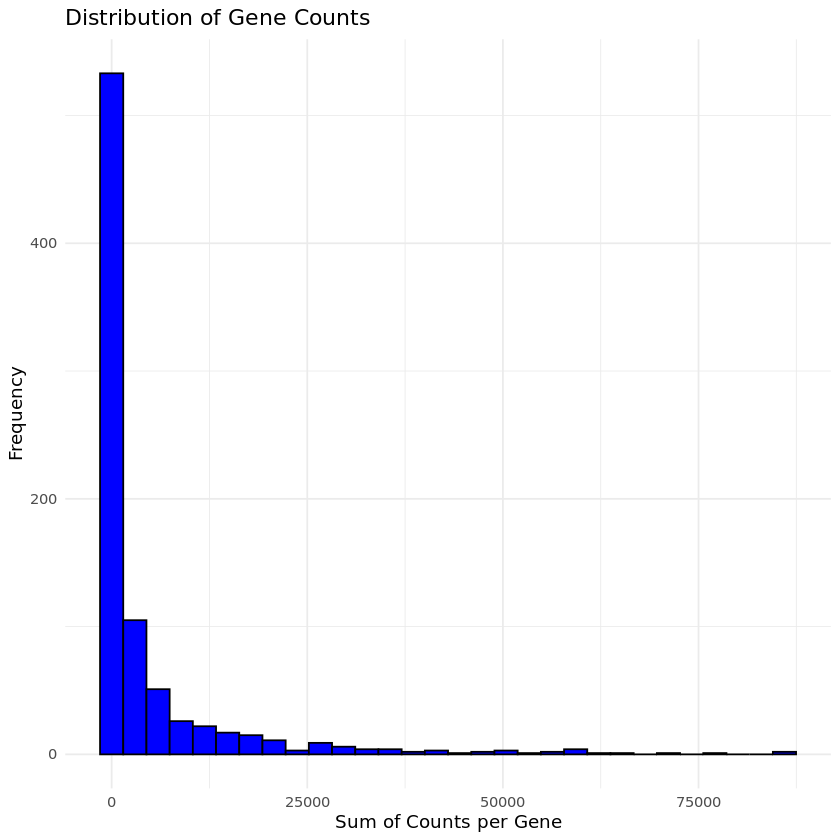

In [113]:
# Create a ggplot
ggplot(gene_counts_sum_df, aes(x = Count)) +
  geom_histogram(bins = 30, fill = 'blue', color = 'black') +
  labs(title = "Distribution of Gene Counts", x = "Sum of Counts per Gene", y = "Frequency") +
  theme_minimal()

In [114]:
gene_counts_sum_df[gene_counts_sum_df$Count == 0,]

,Gene,Count
,<chr>,<dbl>
IGF2,IGF2,0
IFNL1,IFNL1,0


In [115]:
gene_counts_sum_df

,Gene,Count
,<chr>,<dbl>
AGRN,AGRN,135.934771
GNB1,GNB1,10474.846771
UTS2,UTS2,129.802135
PIK3CD,PIK3CD,1904.188619
CORT,CORT,16.668630
DRAXIN,DRAXIN,61.520747
AGTRAP,AGTRAP,15189.746782
TNFRSF8,TNFRSF8,474.249685
EPHA2,EPHA2,2.472859
